## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [ ]:
!nvidia-smi

Sun Dec  1 07:07:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

 To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
# %pip install ultralytics supervision roboflow
%pip install ultralytics roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from IPython.display import Image as IPyImage
from ultralytics import YOLO
from PIL import Image
import requests


## Fine-tune YOLO11 on custom dataset

 When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. When downloading, make sure to select the `yolov11` export format.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from google.colab import userdata

from roboflow import Roboflow
rf = Roboflow(api_key="api-key")        #Insert your api key
project = rf.workspace("computer-vision-yeixu").project("teeth-segmentation-dental-image")   # Dataset for Model training
version = project.version(3)
dataset = version.download("yolov11")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Teeth-Segmentation-dental--image-3 in yolov11:: 100%|██████████| 2958/2958 [00:01<00:00, 1662.81it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11m-seg.pt data={dataset.location}/data.yaml epochs=15 imgsz=640 plots=True

/content
100% 43.3M/43.3M [00:00<00:00, 100MB/s] 
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=/content/datasets/Teeth-Segmentation-dental--image-3/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffe

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	train_batch421.jpg
BoxF1_curve.png					    MaskP_curve.png	train_batch422.jpg
BoxP_curve.png					    MaskPR_curve.png	val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	val_batch0_pred.jpg
BoxR_curve.png					    results.csv		val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	val_batch2_labels.jpg
events.out.tfevents.1733036931.c73070e77757.1190.0  train_batch1.jpg	val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch2.jpg	weights
labels.jpg					    train_batch420.jpg


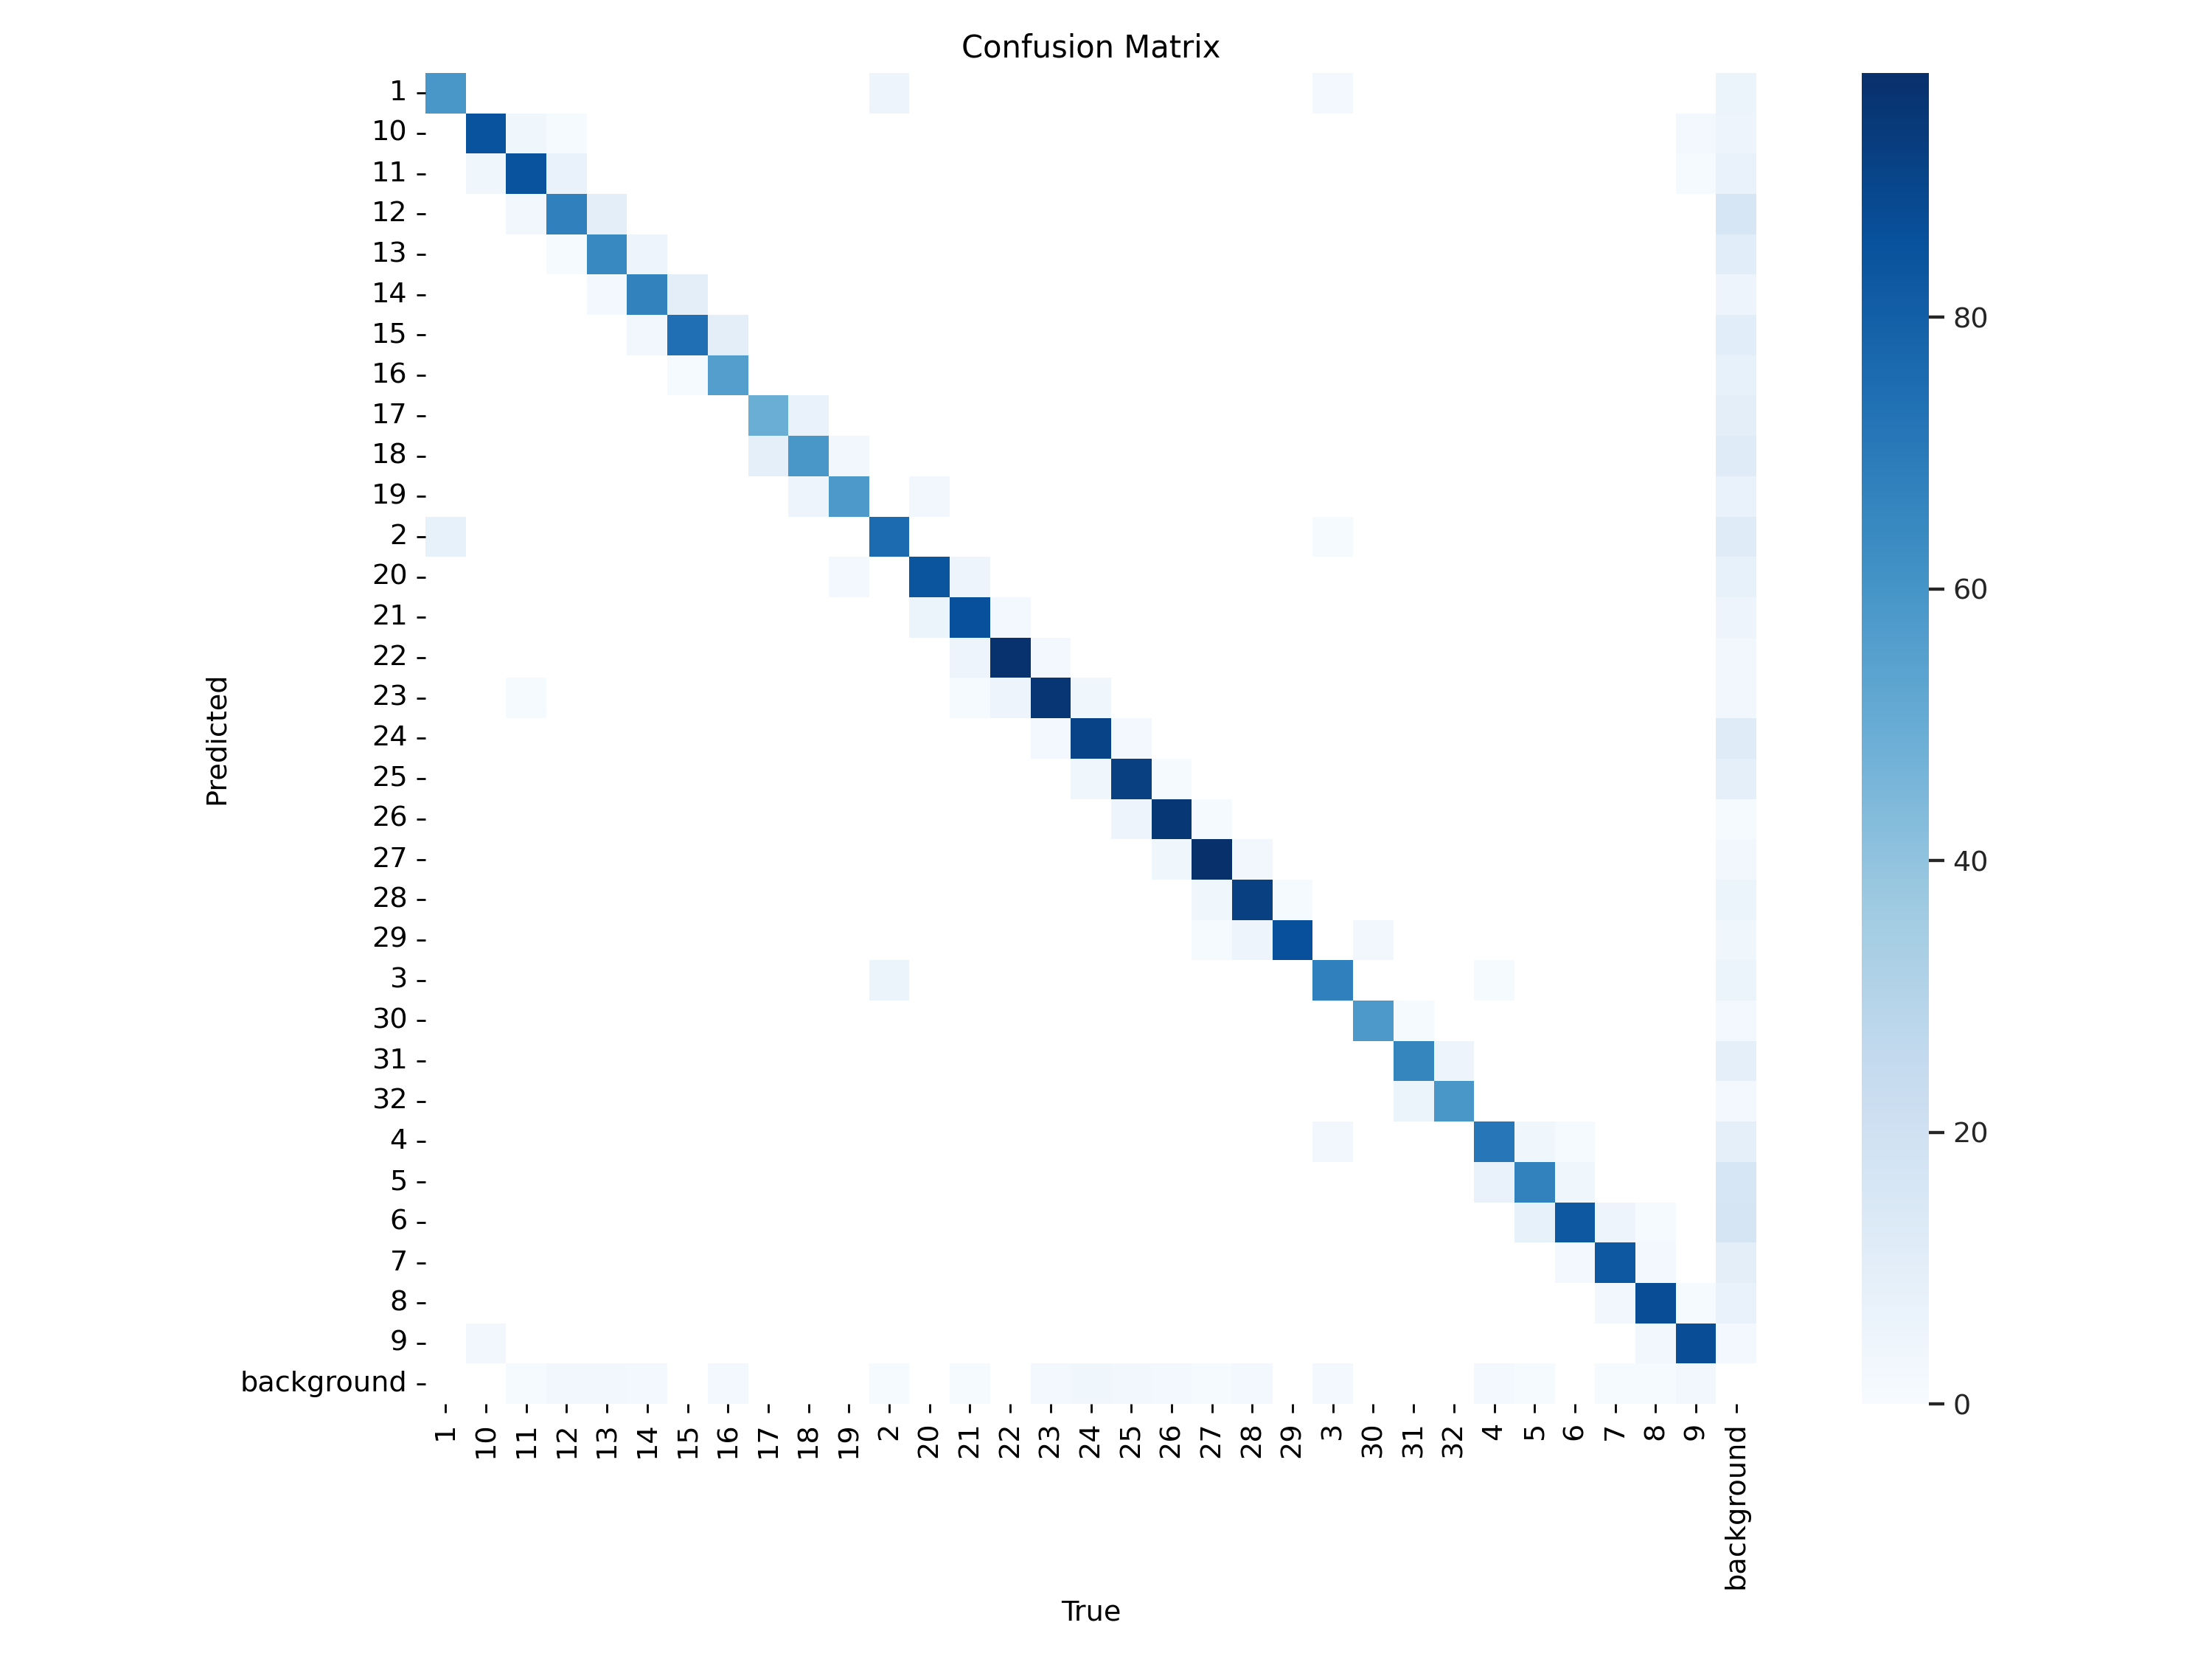

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

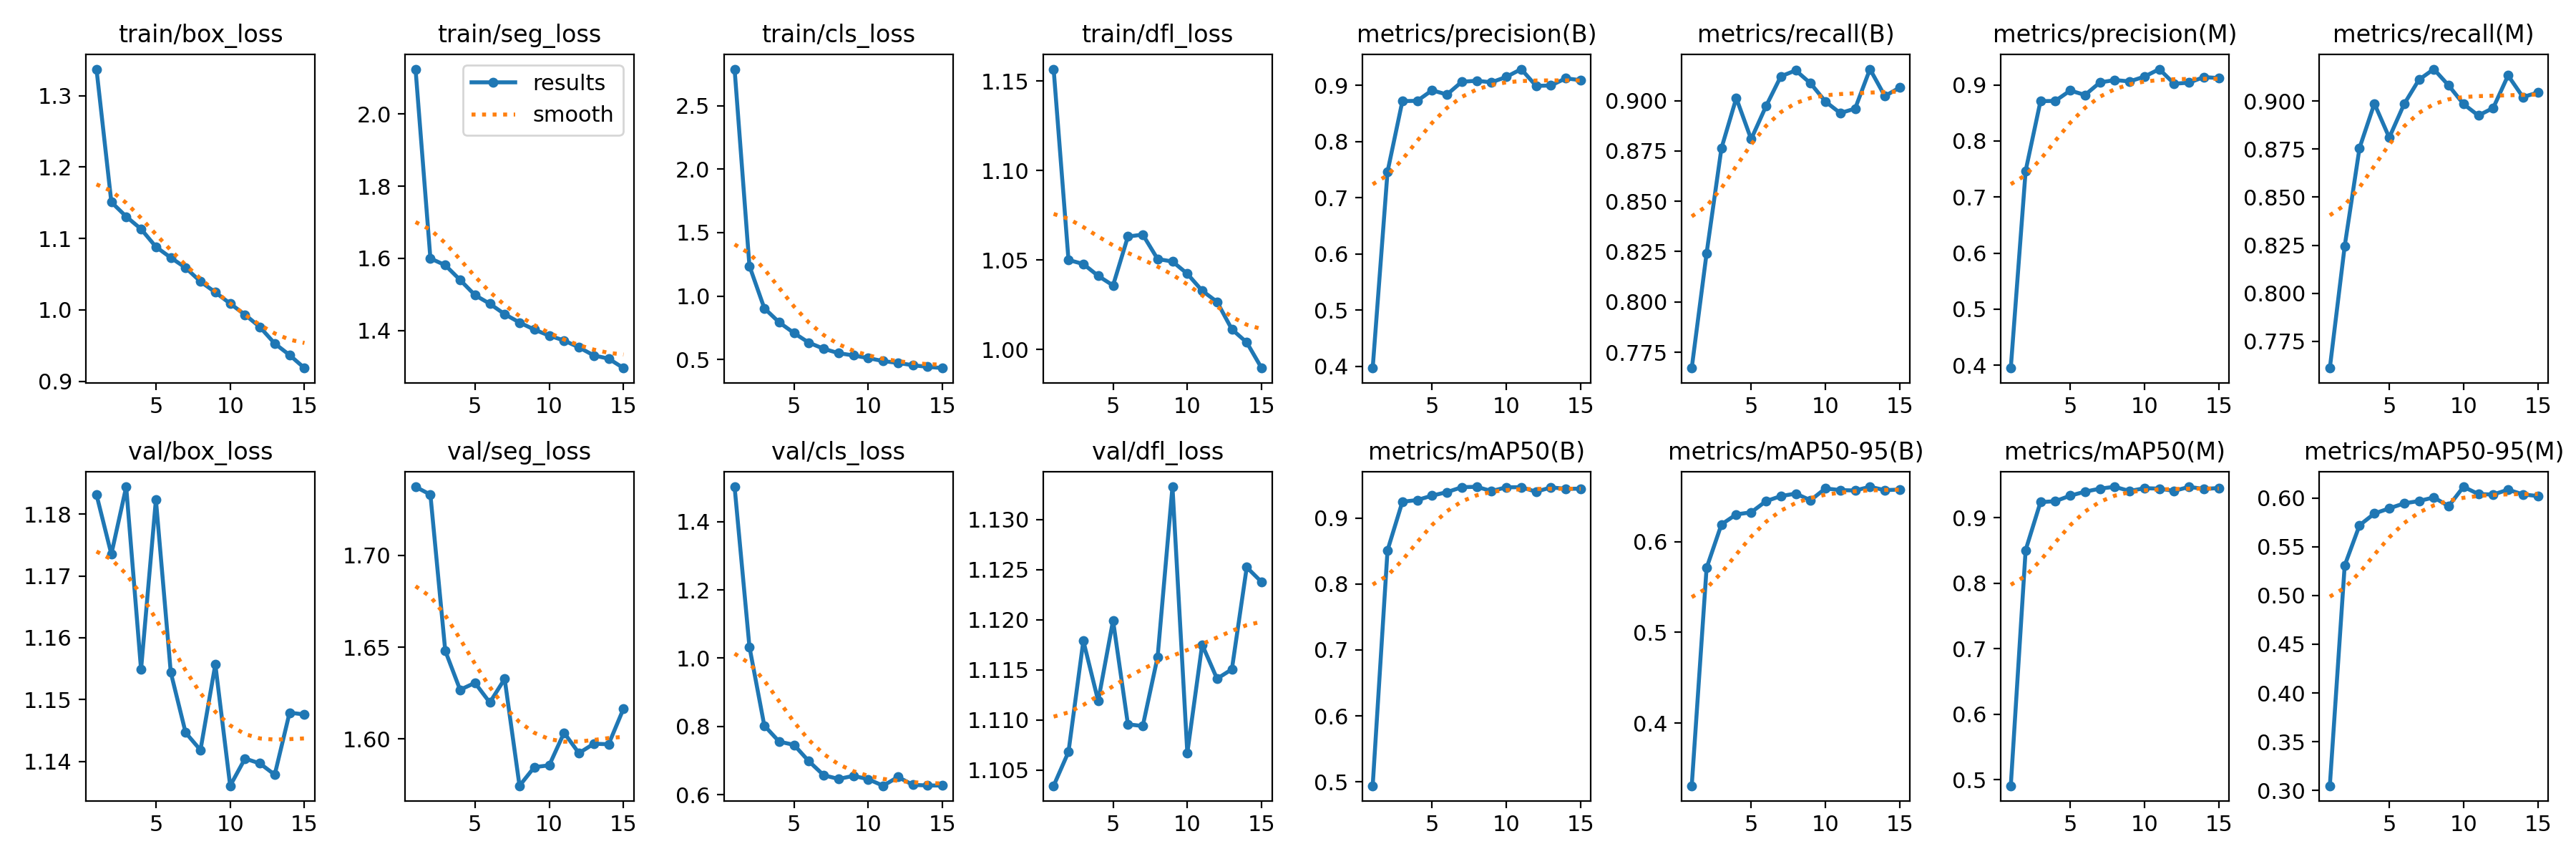

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

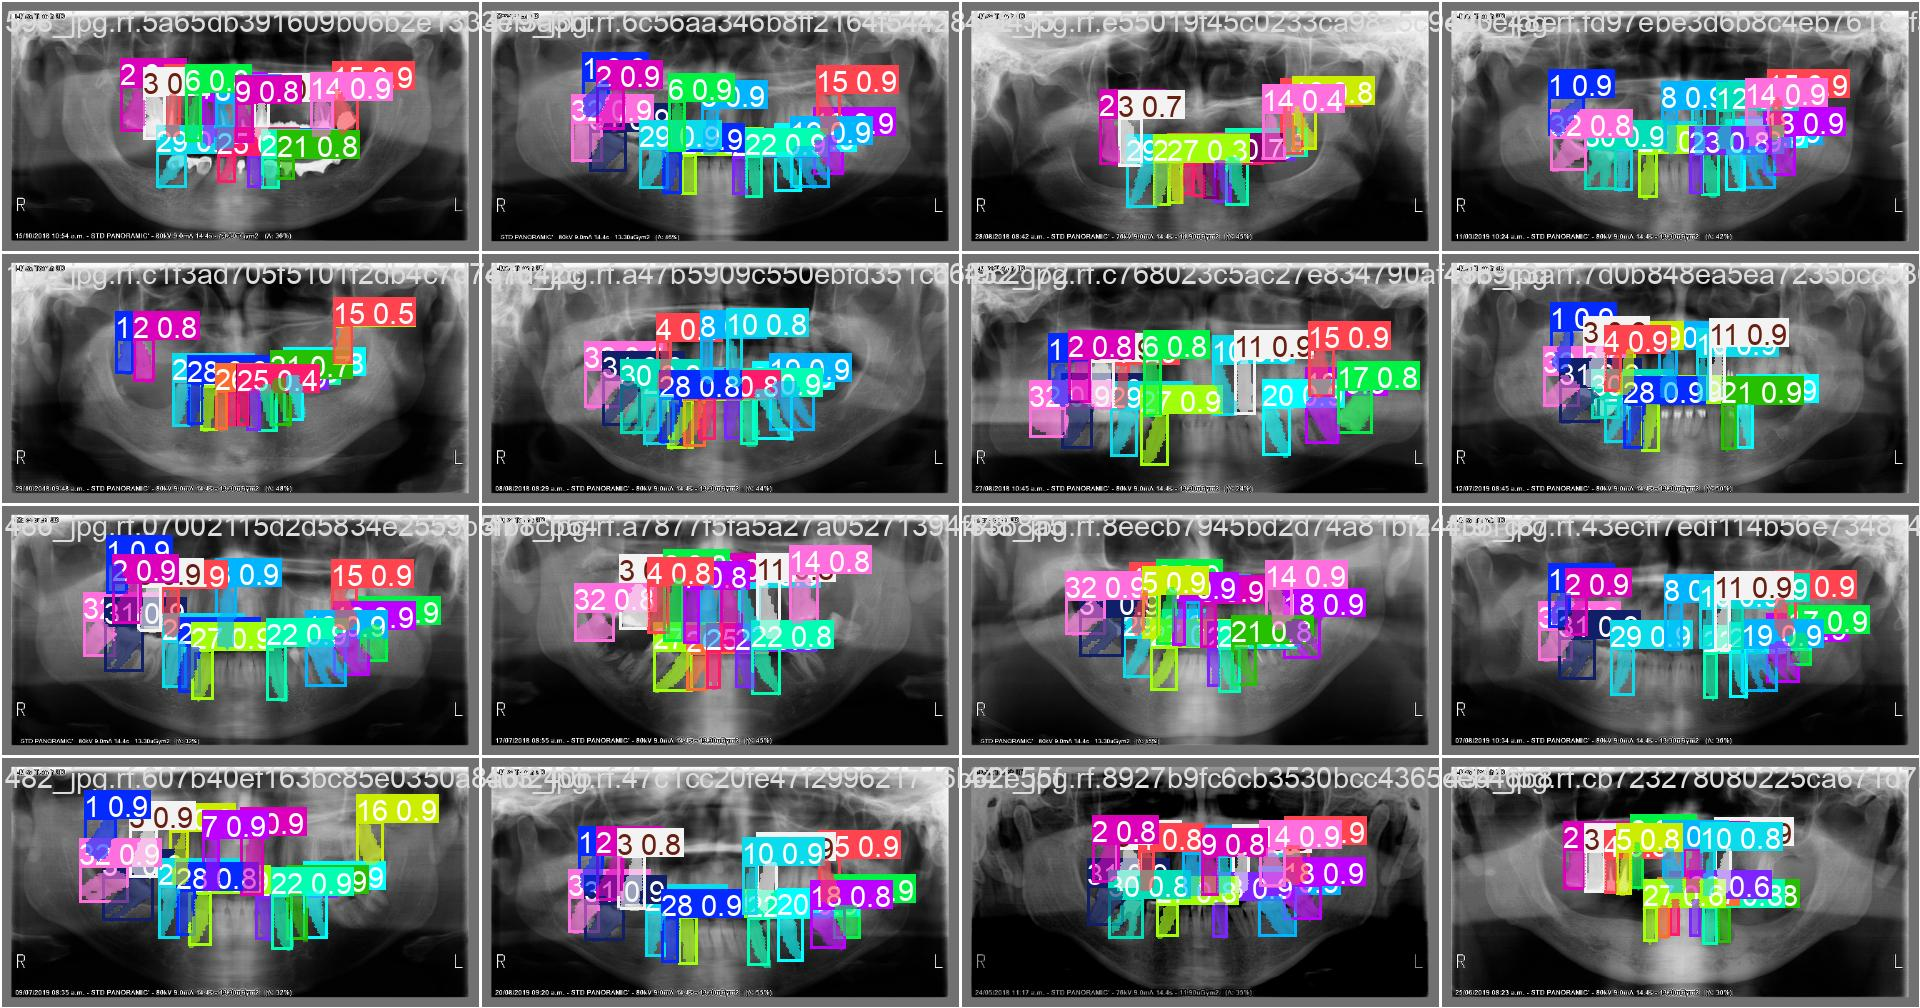

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,359,984 parameters, 0 gradients, 123.1 GFLOPs
val: Scanning /content/datasets/Teeth-Segmentation-dental--image-3/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100% 105/105 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.13it/s]
                   all        105       2726      0.916        0.9      0.947      0.659      0.916      0.899      0.945      0.608
                     1         67         67      0.924      0.902      0.954      0.676      0.923      0.901      0.954      0.633
                    10         91         92      0.912      0.902      0.968      0.633      0.

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,359,984 parameters, 0 gradients, 123.1 GFLOPs

image 1/36 /content/datasets/Teeth-Segmentation-dental--image-3/test/images/111_jpg.rf.6b2eb19ac202c717e2831bfc14775789.jpg: 352x640 1 1, 1 10, 1 11, 1 12, 1 14, 1 15, 1 16, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 29, 1 3, 1 30, 1 31, 1 6, 1 7, 1 8, 1 9, 72.0ms
image 2/36 /content/datasets/Teeth-Segmentation-dental--image-3/test/images/113_jpg.rf.baa233a07afb0551ca860ee14622ee3b.jpg: 352x640 1 1, 1 10, 1 11, 1 12, 1 13, 1 14, 2 15s, 1 16, 1 17, 1 18, 1 2, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 3, 1 31, 1 32, 1 4, 1 5, 1 6, 1 7, 32.0ms
image 3/36 /content/datasets/Teeth-Segmentation-dental--image-3/test/images/123_jpg.rf.4249130d4e1e349ba1cf2f018

**NOTE:** Let's take a look at few results.

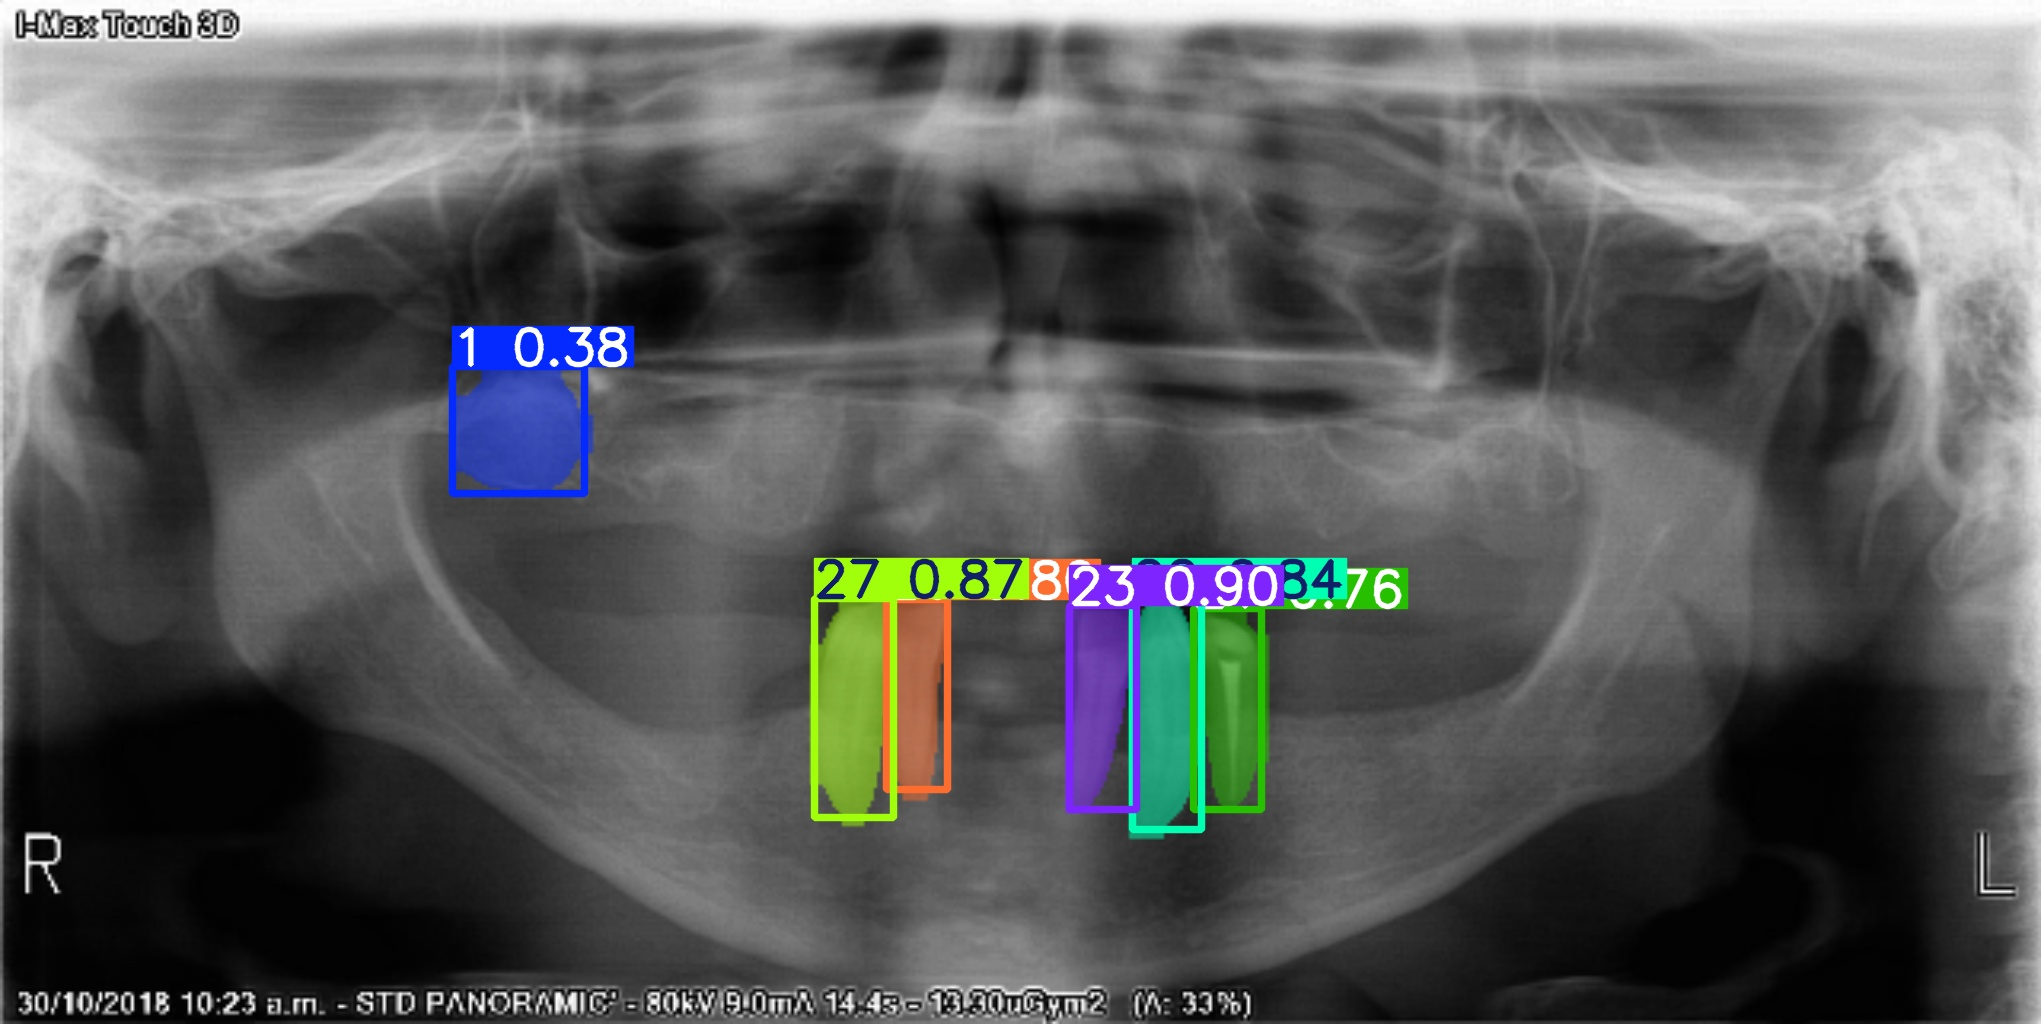

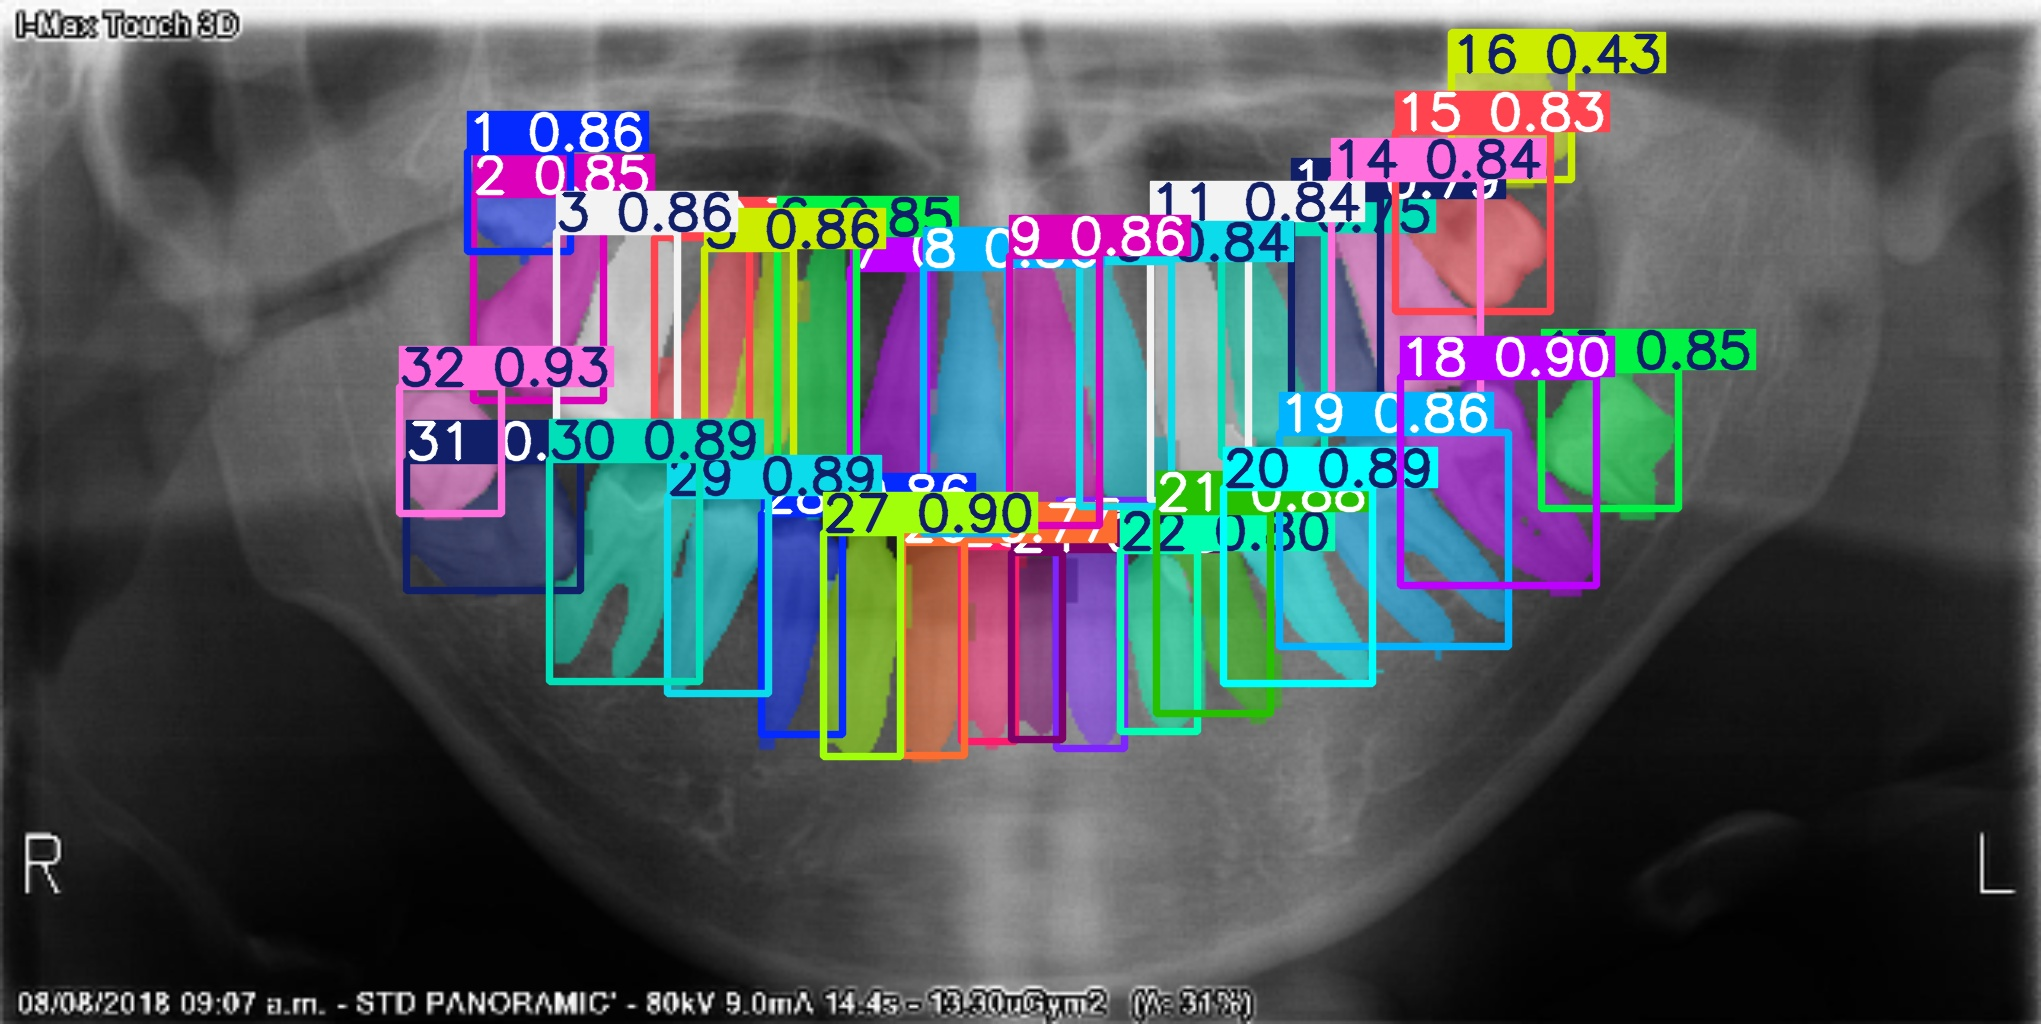

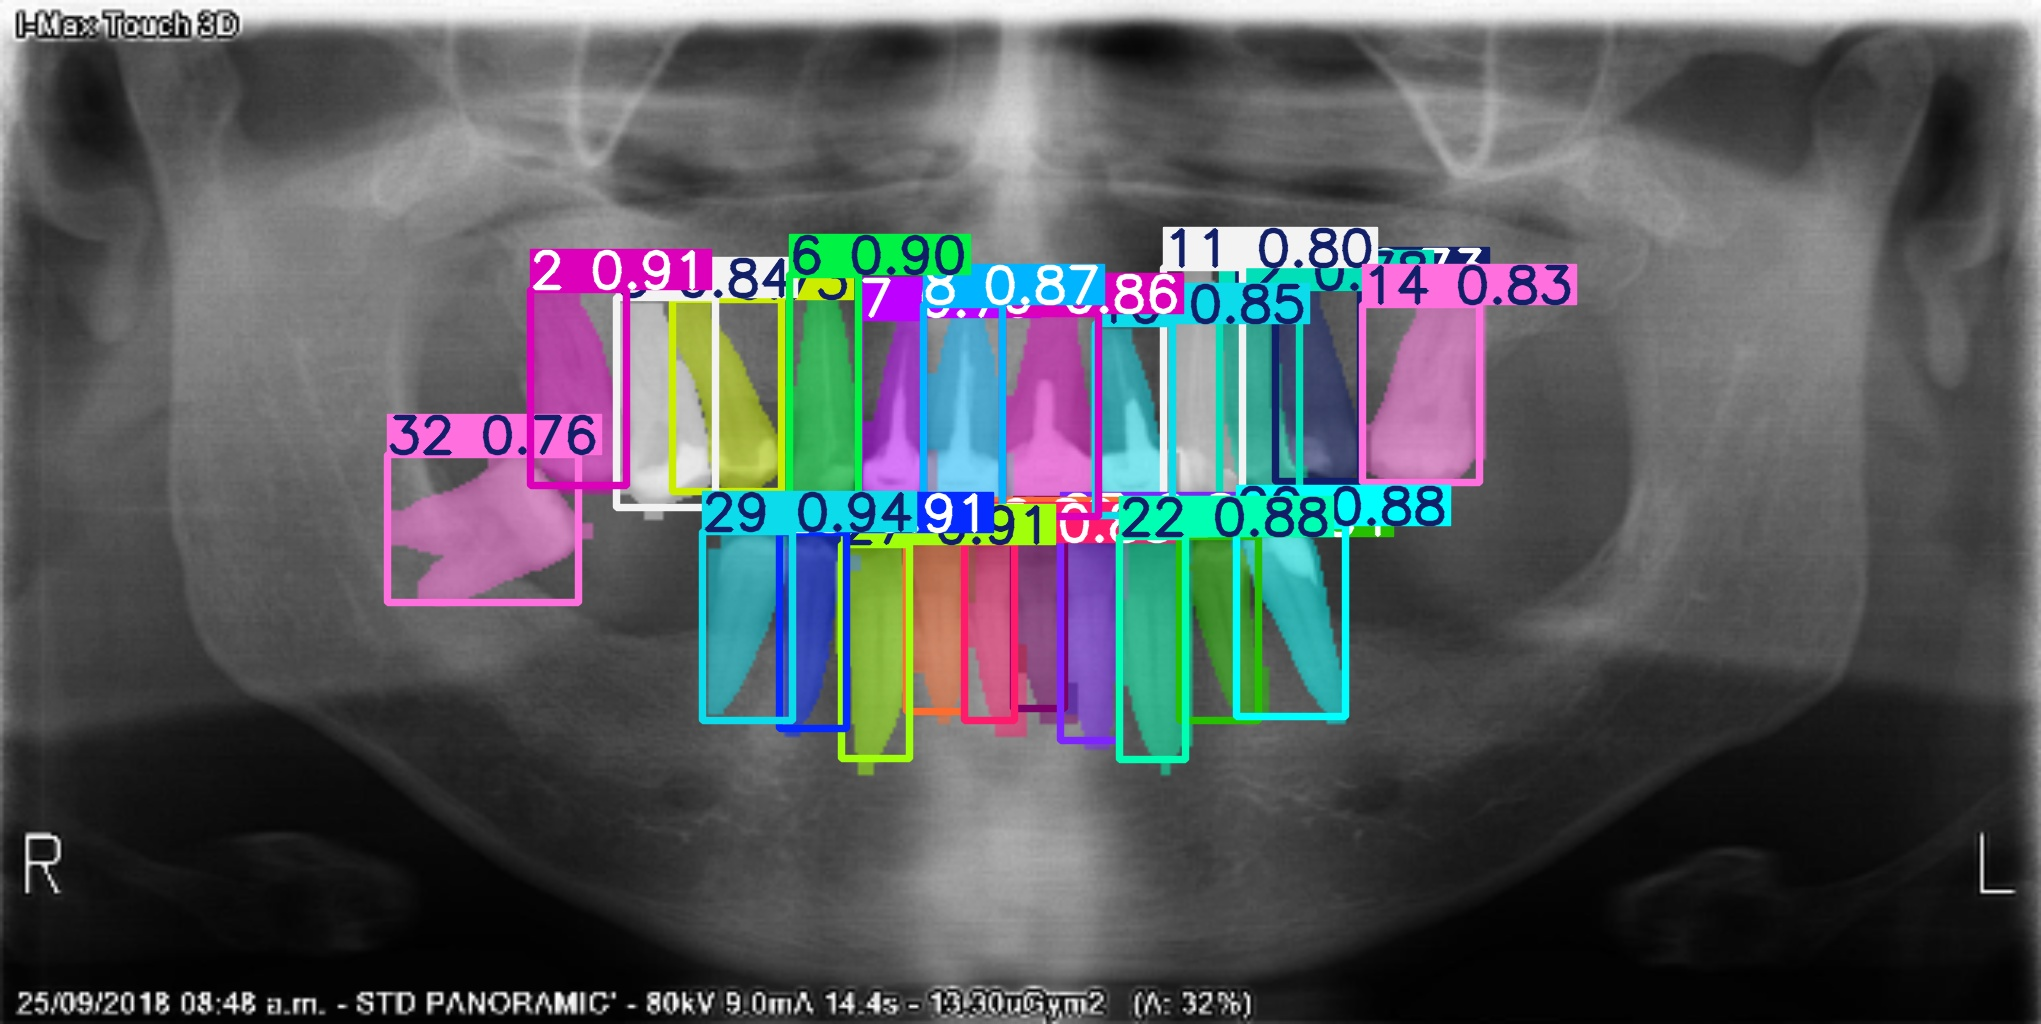

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## downloading trained model

In [ ]:
from google.colab import files
files.download('/content/runs/segment/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To save the model to Google drive, run below cell

In [ ]:
!cp /content/runs/segment/train/weights/best.pt /content/drive/MyDrive/
